# Analyse en Composantes Principales (ACP)

In [140]:
import pandas as pa
import numpy as np
import collections

In [141]:

def droite2DVd(x, vd, point):
  # vd : la droite de vecteur directeur
  y = None

  λ = x - point[0]

  y = ((λ * vd[1]) / vd[0]) + point[1]

  return y # ordonnées des points

In [142]:
vd = [2, 1]
point = (3, 4)
x = 8

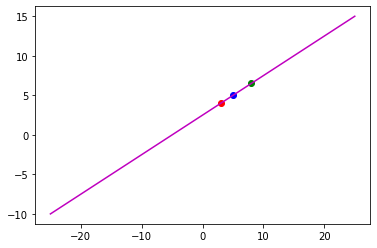

In [143]:
# droite2DVd() test
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(point[0], point[1], c="red")
plt.scatter(point[0] + vd[0], point[1] + vd[1], c="blue")
plt.scatter(x, droite2DVd(x, vd, point), c="green")

X = np.linspace(-25, 25, 100)
Y = [droite2DVd(x, vd, point) for x in X]
plt.plot(X, Y, c="m")


## Exercice 1

In [144]:
dataset = pa.read_csv("https://www.labri.fr/perso/zemmari/datasets/salmon_seabass.csv", sep=";")
df = pa.DataFrame(dataset)

In [145]:
dataX = dataset[["lightness", "width"]]
dataY = dataset["species"]

In [146]:

def CalculACP(X):
  # 1. calcule la moyenne de l'échantillon
  means = np.mean(X)

  # 2. centrage des données
  Z = X - means

  # 3. calcule la "scatter matrix" avec le theorem de la saucisse le retour
  teacherChange = False
  if (teacherChange):
    X = Z / np.var(X)
    S = (len(X) - 1) * X.cov()
  else:
    S = len(X) * X.cov()

  # 4. calcule des vecteurs propres et des valeurs propres de S
  # lambdas or λ (le valeur propre) and vec or E (vecteur propre)
  lambdas, vec = np.linalg.eig(S)

  # tris
  res = dict(zip(lambdas, vec))
  res = collections.OrderedDict(sorted(res.items(), reverse=True))

  return np.array(list(res.values())) # vecteurs propres triés de la plus grande à la plus petite

# les vecteurs propres = les variances des axes

In [147]:
E = CalculACP(dataX)

print("Vecteur propre :", E)

Vecteur propre : [[ 0.91122236 -0.41191481]
 [ 0.41191481  0.91122236]]


In [148]:
# W matrice de projection
def Projection(W, X):
  # calcule de Z
  means = np.mean(X) # calcule la moyenne de l'échantillon
  Z = X - means # centrage des données

  # 6. Le vecteur recherché est
  y = np.dot(W.T, Z.T) # E.T・z

  return y # projection de X.

In [149]:
# 5. E (vecteur propre)
E = CalculACP(dataX)

# On prend le premier qui a la plus grosse valeur propre
e1 = E[:,0]
e2 = E[:,1]
print(e1)
print(e2)

Y = Projection(e1, dataX)
Y

[0.91122236 0.41191481]
[-0.41191481  0.91122236]


array([ 2.25100964, -1.2019596 , -5.42628467, ...,  9.45037968,
        2.56895816,  0.53158506])

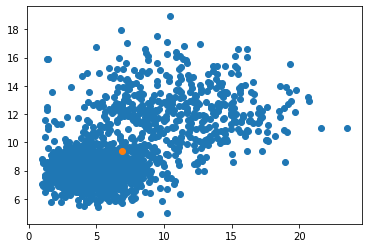

In [150]:
import matplotlib.pyplot as plt
means = np.mean(dataX)
plt.scatter(dataX["lightness"], dataX["width"])
plt.scatter(means["lightness"], means["width"])

10.17020098592207


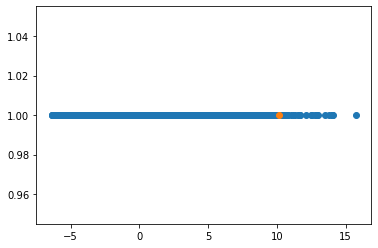

In [151]:
import matplotlib.pyplot as plt

plt.scatter(Y, np.ones(len(Y)))
origin = np.dot(e1.T, means.T)
print(origin)
plt.scatter(origin, 1)

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataX, dataY, test_size=0.2, random_state=1)
print(len(X_train), str(len(X_train) * 100 / len(X)) + "%")
print(len(X_test), str(len(X_test) * 100 / len(X)) + "%")

1200 1200.0%
300 300.0%


In [153]:
from sklearn.decomposition import PCA
# ACP train
pca = PCA(n_components=1)
pca.fit(X_train.values)
Yp_train = pca.transform(X_train.values)

# ACP test
pca = PCA(n_components=1)
pca.fit(X_test.values)
Yp_test = pca.transform(X_test.values)

In [154]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### MAP 2D vs MAP ACP

In [155]:
print("MAP 2D :")
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train.values, Y_train)

# Evaluate
Y_pred = nb.predict(X_test.values)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

MAP 2D :
[[197   5]
 [  9  89]]
95.33%


In [156]:
print("MAP ACP :")
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(Yp_train, Y_train)

# Evaluate
Y_pred = nb.predict(Yp_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

MAP ACP :
[[195   7]
 [ 14  84]]
93.00%


### k-nn 2D vs k-nn ACP

In [157]:
print("k-nn 2D :")
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train.values, Y_train)

# Evaluate
Y_pred = knn.predict(X_test.values)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

k-nn 2D :
[[197   5]
 [ 11  87]]
94.67%


In [158]:
print("k-nn ACP :")
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(Yp_train, Y_train)

# Evaluate
Y_pred = knn.predict(Yp_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

k-nn ACP :
[[192  10]
 [ 14  84]]
92.00%


## Exercice 2

In [159]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [160]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [162]:
X = cancer.data
X.shape

(569, 30)

In [161]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(cancer)

TypeError: float() argument must be a string or a number, not 'Bunch'

In [ ]:
Y = pca.transform(cancer)
print(Y.T)

[[ 2.25100964 -1.2019596  -5.42628467 ...  9.45037968  2.56895816
   0.53158506]]
